In [1]:
import os
import pandas
import numpy as np
import tensorflow as tf
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
data_dir = "GTSDB/"
np_images_filename = "images.npy"
input_shape = (320, 544, 3)
grid_shape = (10, 17, 1) # not easiely modifiebl
base_model = tf.keras.applications.vgg19

/home/matech/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
model = base_model.VGG19(input_shape=(320, 544, 3), include_top=False)
print(type(model))

<class 'tensorflow.python.keras._impl.keras.engine.training.Model'>


In [3]:
print(type(model.layers))

<class 'list'>


In [91]:
for layer in model.layers:
    layer.trainable = False
    print(type(layer), layer.output_shape)

<class 'tensorflow.python.keras._impl.keras.engine.topology.InputLayer'> (None, 320, 544, 3)
<class 'tensorflow.python.keras._impl.keras.layers.convolutional.Conv2D'> (None, 320, 544, 64)
<class 'tensorflow.python.keras._impl.keras.layers.convolutional.Conv2D'> (None, 320, 544, 64)
<class 'tensorflow.python.keras._impl.keras.layers.pooling.MaxPooling2D'> (None, 160, 272, 64)
<class 'tensorflow.python.keras._impl.keras.layers.convolutional.Conv2D'> (None, 160, 272, 128)
<class 'tensorflow.python.keras._impl.keras.layers.convolutional.Conv2D'> (None, 160, 272, 128)
<class 'tensorflow.python.keras._impl.keras.layers.pooling.MaxPooling2D'> (None, 80, 136, 128)
<class 'tensorflow.python.keras._impl.keras.layers.convolutional.Conv2D'> (None, 80, 136, 256)
<class 'tensorflow.python.keras._impl.keras.layers.convolutional.Conv2D'> (None, 80, 136, 256)
<class 'tensorflow.python.keras._impl.keras.layers.convolutional.Conv2D'> (None, 80, 136, 256)
<class 'tensorflow.python.keras._impl.keras.layers

In [5]:
def get_image(img_name):
    img = imread(img_name)
    img = imresize(img, input_shape)
    img = img.astype(float)
    return img
    
if os.path.isfile(np_images_filename):
    print("Loading: " + np_images_filename)
    images = np.load(np_images_filename)
else:
    images = np.array([get_image(data_dir + "00000.ppm")])
    for i in range(1, 900):
        img_name = data_dir + str(i).zfill(5) + ".ppm"
        print("Processing: " + img_name)
        img = get_image(img_name)
        images = np.concatenate((images, [img]), axis=0)
        images = base_model.preprocess_input(images)
        print(images.shape)
        np.save(np_images_filename, images)
print(images.dtype)

Loading: images.npy
float64


In [74]:
def grid_of_center(box): #("x_min", "y_min", "x_max", "y_max")
    original_with = 1360
    original_height = 800
    c_x = (box[0] + box[2])/2
    c_y = (box[1] + box[3])/2
    return int(c_y/original_height*grid_shape[0]), int(c_x/original_with*grid_shape[1])


labels = pandas.read_csv(os.path.join(data_dir, "gt.txt"), sep=";", header=None, 
                         names=("file_name", "x_min", "y_min", "x_max", "y_max", "label"))
labels_nn = np.zeros((images.shape[0], grid_shape[0], grid_shape[1], grid_shape[2]))
for i in range(images.shape[0]):
    l = labels_nn[i, :, :, :]
    img_name = str(i).zfill(5) + ".ppm"
    #print("Processing: " + img_name)
    for row in labels[labels["file_name"] == img_name].iterrows():
        row = list(row[1])
        u, v = grid_of_center(row[1:-1])
        l[u, v, -1] = 1

In [ ]:
plt.imshow(labels_nn.mean(0).reshape((10,17)))
plt.show()

In [147]:
predictions = tf.keras.layers.Conv2D(1, 3, padding="same")(model.output)

# creating the final model 
model_final = tf.keras.models.Model(inputs=model.input, outputs=predictions)

# compile the model 
def mean_squared_error(y_true, y_pred):
    K = tf.keras.backend
    return K.mean(K.square(y_pred - y_true), axis=(1,2,3))
model_final.compile(loss=mean_squared_error, optimizer="adam", metrics=["accuracy"])

In [154]:
res = model_final.predict(images[:10, :, :, :])

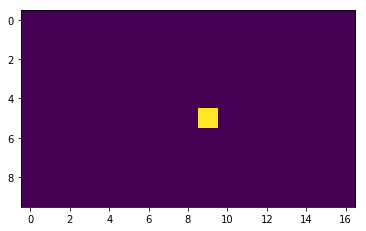

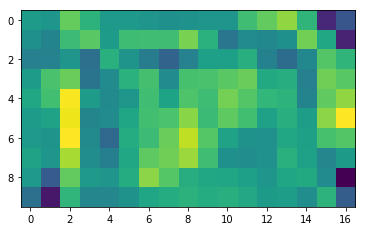

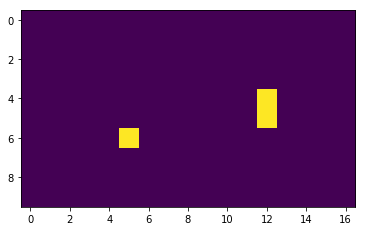

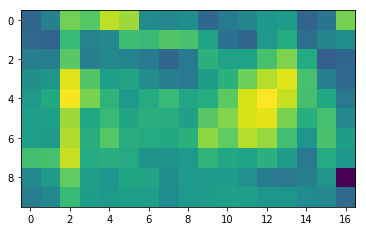

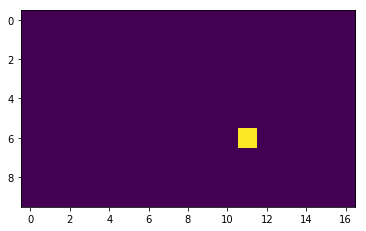

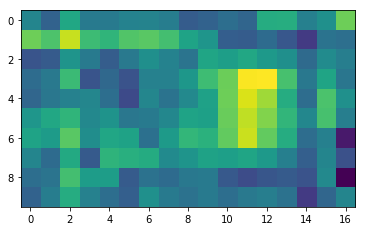

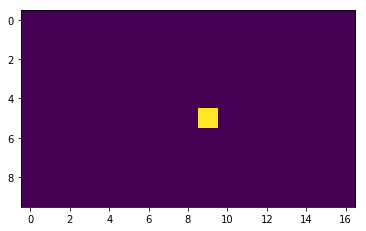

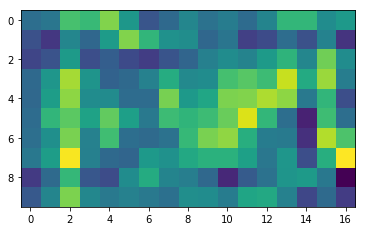

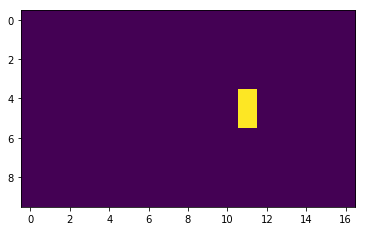

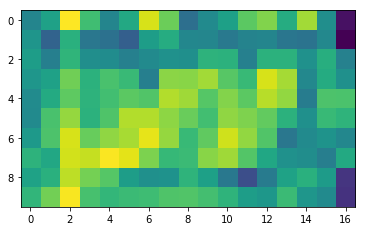

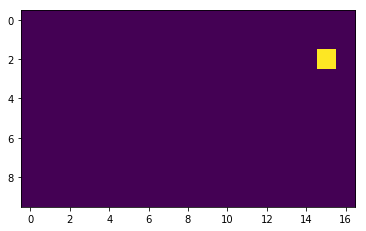

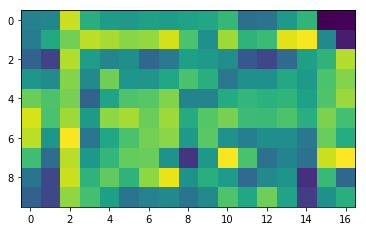

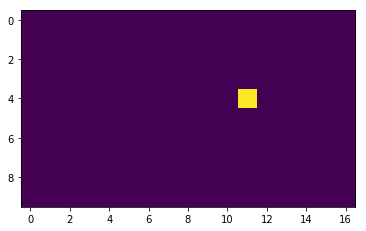

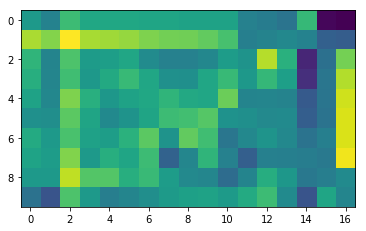

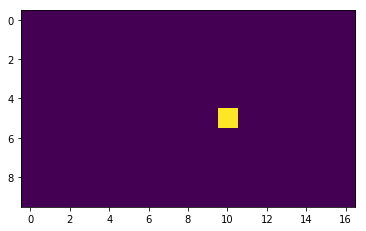

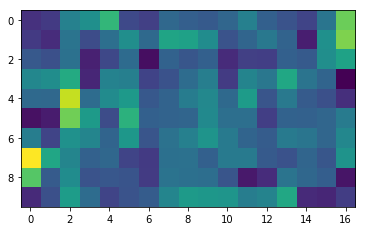

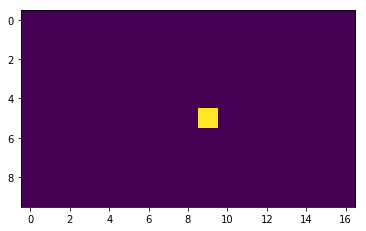

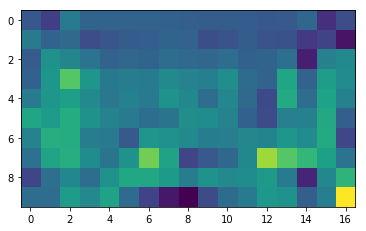

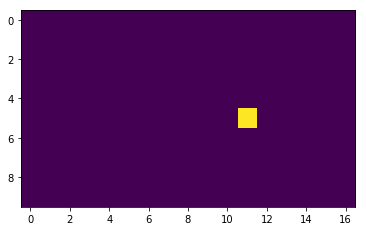

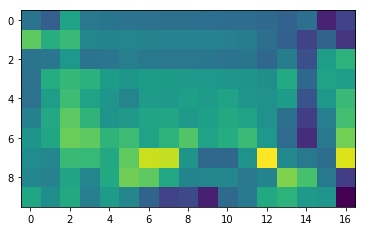

In [155]:
for i in range(10):
    plt.imshow(labels_nn[i].reshape((10, 17)))
    plt.show()
    plt.imshow(res[i].reshape((10, 17)))
    plt.show()

In [153]:
model_final.fit(images[:10, :, :, :], labels_nn[:10, :, :, :], 10, 20000)

Epoch 1/20000
10/10 [==============================] - 0s - loss: 0.0084 - acc: 0.9924
Epoch 2/20000
10/10 [==============================] - 0s - loss: 0.0084 - acc: 0.9924
Epoch 3/20000
10/10 [==============================] - 0s - loss: 0.0084 - acc: 0.9924
Epoch 4/20000
10/10 [==============================] - 0s - loss: 0.0084 - acc: 0.9924
Epoch 5/20000
10/10 [==============================] - 0s - loss: 0.0084 - acc: 0.9924
Epoch 6/20000
10/10 [==============================] - 0s - loss: 0.0084 - acc: 0.9924
Epoch 7/20000
10/10 [==============================] - 0s - loss: 0.0084 - acc: 0.9924
Epoch 8/20000
10/10 [==============================] - 0s - loss: 0.0084 - acc: 0.9924
Epoch 9/20000
10/10 [==============================] - 0s - loss: 0.0084 - acc: 0.9924
Epoch 10/20000
10/10 [==============================] - 0s - loss: 0.0084 - acc: 0.9924
Epoch 11/20000
10/10 [==============================] - 0s - loss: 0.0084 - acc: 0.9924
Epoch 12/20000
10/10 [===================

10/10 [==============================] - 0s - loss: 0.0083 - acc: 0.9924
Epoch 95/20000
10/10 [==============================] - 0s - loss: 0.0083 - acc: 0.9924
Epoch 96/20000
10/10 [==============================] - 0s - loss: 0.0083 - acc: 0.9924
Epoch 97/20000
10/10 [==============================] - 0s - loss: 0.0083 - acc: 0.9924
Epoch 98/20000
10/10 [==============================] - 0s - loss: 0.0083 - acc: 0.9924
Epoch 99/20000
10/10 [==============================] - 0s - loss: 0.0082 - acc: 0.9924
Epoch 100/20000
10/10 [==============================] - 0s - loss: 0.0082 - acc: 0.9924
Epoch 101/20000
10/10 [==============================] - 0s - loss: 0.0082 - acc: 0.9924
Epoch 102/20000
10/10 [==============================] - 0s - loss: 0.0082 - acc: 0.9924
Epoch 103/20000
10/10 [==============================] - 0s - loss: 0.0082 - acc: 0.9924
Epoch 104/20000
10/10 [==============================] - 0s - loss: 0.0082 - acc: 0.9924
Epoch 105/20000
10/10 [===================

10/10 [==============================] - 0s - loss: 0.0081 - acc: 0.9924
Epoch 187/20000
10/10 [==============================] - 0s - loss: 0.0081 - acc: 0.9924
Epoch 188/20000
10/10 [==============================] - 0s - loss: 0.0081 - acc: 0.9924
Epoch 189/20000
10/10 [==============================] - 0s - loss: 0.0081 - acc: 0.9924
Epoch 190/20000
10/10 [==============================] - 0s - loss: 0.0081 - acc: 0.9924
Epoch 191/20000
10/10 [==============================] - 0s - loss: 0.0081 - acc: 0.9924
Epoch 192/20000
10/10 [==============================] - 0s - loss: 0.0081 - acc: 0.9924
Epoch 193/20000
10/10 [==============================] - 0s - loss: 0.0081 - acc: 0.9924
Epoch 194/20000
10/10 [==============================] - 0s - loss: 0.0081 - acc: 0.9924
Epoch 195/20000
10/10 [==============================] - 0s - loss: 0.0081 - acc: 0.9924
Epoch 196/20000
10/10 [==============================] - 0s - loss: 0.0081 - acc: 0.9924
Epoch 197/20000
10/10 [==============

10/10 [==============================] - 0s - loss: 0.0080 - acc: 0.9924
Epoch 279/20000
10/10 [==============================] - 0s - loss: 0.0080 - acc: 0.9924
Epoch 280/20000
10/10 [==============================] - 0s - loss: 0.0080 - acc: 0.9924
Epoch 281/20000
10/10 [==============================] - 0s - loss: 0.0080 - acc: 0.9924
Epoch 282/20000
10/10 [==============================] - 0s - loss: 0.0080 - acc: 0.9924
Epoch 283/20000
10/10 [==============================] - 0s - loss: 0.0080 - acc: 0.9924
Epoch 284/20000
10/10 [==============================] - 0s - loss: 0.0080 - acc: 0.9924
Epoch 285/20000
10/10 [==============================] - 0s - loss: 0.0080 - acc: 0.9924
Epoch 286/20000
10/10 [==============================] - 0s - loss: 0.0080 - acc: 0.9924
Epoch 287/20000
10/10 [==============================] - 0s - loss: 0.0080 - acc: 0.9924
Epoch 288/20000
10/10 [==============================] - 0s - loss: 0.0080 - acc: 0.9924
Epoch 289/20000
10/10 [==============

10/10 [==============================] - 0s - loss: 0.0080 - acc: 0.9924
Epoch 371/20000
10/10 [==============================] - 0s - loss: 0.0080 - acc: 0.9924
Epoch 372/20000
10/10 [==============================] - 0s - loss: 0.0080 - acc: 0.9924
Epoch 373/20000
10/10 [==============================] - 0s - loss: 0.0080 - acc: 0.9924
Epoch 374/20000
10/10 [==============================] - 0s - loss: 0.0080 - acc: 0.9924
Epoch 375/20000
10/10 [==============================] - 0s - loss: 0.0080 - acc: 0.9924
Epoch 376/20000
10/10 [==============================] - 0s - loss: 0.0080 - acc: 0.9924
Epoch 377/20000
10/10 [==============================] - 0s - loss: 0.0080 - acc: 0.9924
Epoch 378/20000
10/10 [==============================] - 0s - loss: 0.0080 - acc: 0.9924
Epoch 379/20000
10/10 [==============================] - 0s - loss: 0.0080 - acc: 0.9924
Epoch 380/20000
10/10 [==============================] - 0s - loss: 0.0080 - acc: 0.9924
Epoch 381/20000
10/10 [==============

10/10 [==============================] - 0s - loss: 0.0079 - acc: 0.9924
Epoch 463/20000


KeyboardInterrupt: 